In [47]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [48]:
df = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')
df.head(10)

,Id,Sentiment,Text_Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
5,6,negative,Untuk penembakan paket dari <PRODUCT_NAME> mas...
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa..."
7,8,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...
8,9,negative,keluhan gak ditanggapi. bikin emosi aja. pulsa...
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...


## Visualisasi Data Sebaran Sentimen

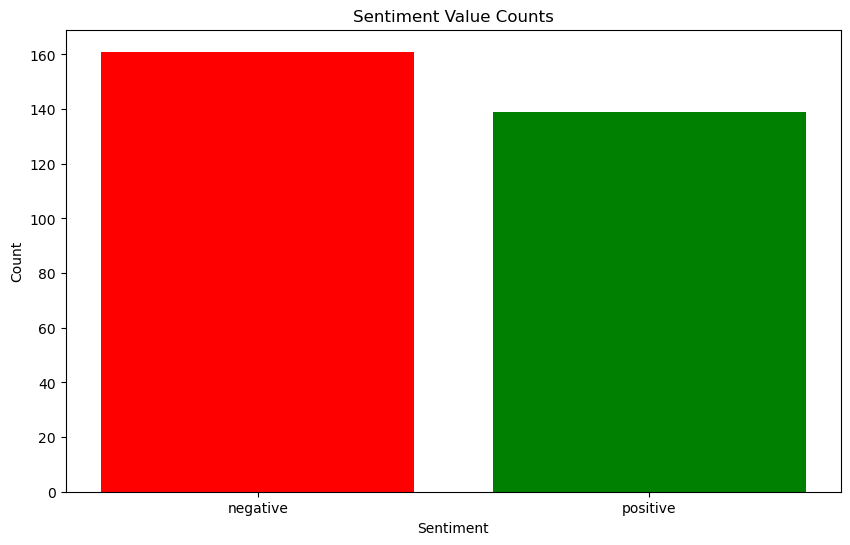

In [49]:
import matplotlib.pyplot as plt

# Get the value counts of the Sentiment column
sentiment_counts = df.Sentiment.value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=('red', 'green'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Value Counts')
plt.show()

In [50]:
#Dimentions of the dataset & information about dataset
print('Dimentions of dataset:', df.shape)
#Checking the dtypes of all the columns
df.info()

Dimentions of dataset: (300, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          300 non-null    int64 
 1   Sentiment   300 non-null    object
 2   Text_Tweet  300 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [51]:
df.describe()

,Id
count,300.000000
mean,150.500000
std,86.746758
min,1.000000
25%,75.750000
50%,150.500000
75%,225.250000
max,300.000000


In [52]:
df.isnull().sum()

Id            0
Sentiment     0
Text_Tweet    0
dtype: int64

### Dataset tidak mempunyai data yang kosong

In [53]:
# CEK DUPLIKASI DATA
df.duplicated().sum()

0

### Cek jumlah data

In [54]:
df['word_count'] = df['Text_Tweet'].apply(lambda x: len(str(x).split(" ")))
df[['Text_Tweet','word_count']].head(10)

,Text_Tweet,word_count
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,7
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",6
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,21
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,11
4,Selamat malam PENDUSTA <PROVIDER_NAME>,5
5,Untuk penembakan paket dari <PRODUCT_NAME> mas...,9
6,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",22
7,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,12
8,keluhan gak ditanggapi. bikin emosi aja. pulsa...,19
9,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,10


### Jumlah Karakter - termasuk spasi

In [55]:
df['char_count'] = df['Text_Tweet'].str.len() # this also includes spaces
df[['Text_Tweet','char_count']].head(10)

,Text_Tweet,char_count
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,84
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",53
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,121
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,74
4,Selamat malam PENDUSTA <PROVIDER_NAME>,39
5,Untuk penembakan paket dari <PRODUCT_NAME> mas...,76
6,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",172
7,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,104
8,keluhan gak ditanggapi. bikin emosi aja. pulsa...,130
9,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,97


In [56]:
#Average Word Length:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
df['avg_word'] = df['Text_Tweet'].apply(lambda x: avg_word(x))
df[['Text_Tweet','avg_word']].head(10)

,Text_Tweet,avg_word
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,11.142857
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",8.000000
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,5.315789
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,5.818182
4,Selamat malam PENDUSTA <PROVIDER_NAME>,8.750000
5,Untuk penembakan paket dari <PRODUCT_NAME> mas...,7.555556
6,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",7.190476
7,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,7.750000
8,keluhan gak ditanggapi. bikin emosi aja. pulsa...,5.894737
9,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,8.800000


In [57]:
# import nltk
# nltk.download()

In [58]:
#Number of stop Words:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afidz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
df['stopwords'] = df['Text_Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Text_Tweet','stopwords']].head(10)

,Text_Tweet,stopwords
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,0
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",0
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,0
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,0
4,Selamat malam PENDUSTA <PROVIDER_NAME>,0
5,Untuk penembakan paket dari <PRODUCT_NAME> mas...,0
6,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",1
7,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,0
8,keluhan gak ditanggapi. bikin emosi aja. pulsa...,0
9,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,0


In [60]:
#Number of special character:
df['hastags'] = df['Text_Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Text_Tweet','hastags']].head(10)

,Text_Tweet,hastags
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,0
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",0
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,0
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,0
4,Selamat malam PENDUSTA <PROVIDER_NAME>,0
5,Untuk penembakan paket dari <PRODUCT_NAME> mas...,0
6,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",0
7,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,0
8,keluhan gak ditanggapi. bikin emosi aja. pulsa...,0
9,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,0


In [61]:
#Number of numerics:
df['numerics'] = df['Text_Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Text_Tweet','numerics']].head(10)

,Text_Tweet,numerics
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,0
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",0
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,1
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,0
4,Selamat malam PENDUSTA <PROVIDER_NAME>,0
5,Untuk penembakan paket dari <PRODUCT_NAME> mas...,0
6,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",0
7,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,0
8,keluhan gak ditanggapi. bikin emosi aja. pulsa...,0
9,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,0


## Wordcloud

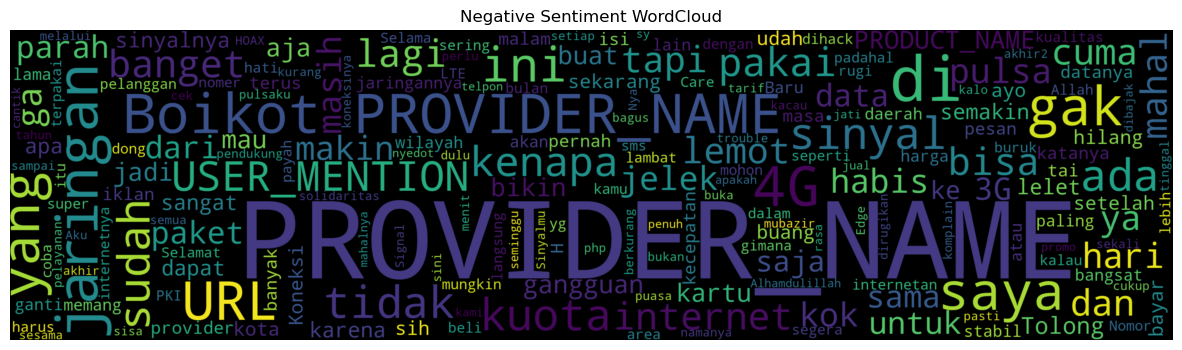

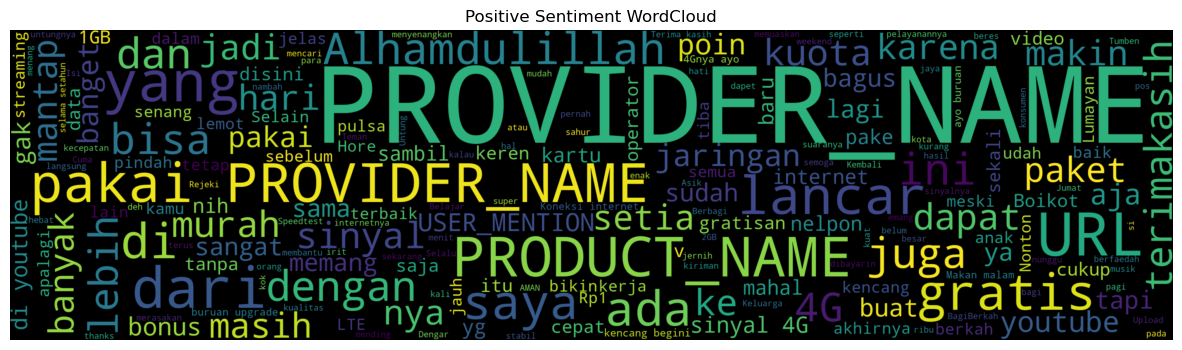

In [62]:
from wordcloud import WordCloud, STOPWORDS
negative_df = df[df['Sentiment'] == 'negative']
positive_df = df[df['Sentiment'] == 'positive']

# Define a function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['Text_Tweet'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT' ])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black', 
                          width=3000, height=800).generate(cleaned_word)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Generate and display WordClouds for each sentiment category
generate_wordcloud(negative_df, 'Negative Sentiment WordCloud')
generate_wordcloud(positive_df, 'Positive Sentiment WordCloud')

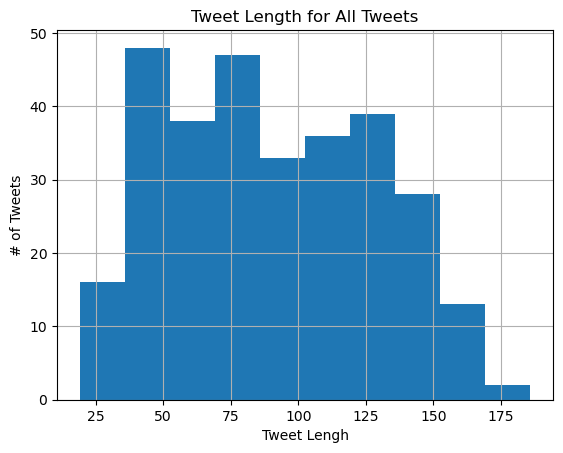

In [63]:
df['tweet_length'] = df.Text_Tweet.apply(len)

df.tweet_length.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [64]:
df.head()

,Id,Sentiment,Text_Tweet,word_count,char_count,avg_word,stopwords,hastags,numerics,tweet_length
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,7,84,11.142857,0,0,0,84
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",6,53,8.000000,0,0,0,53
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,21,121,5.315789,0,0,1,121
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,11,74,5.818182,0,0,0,74
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,5,39,8.750000,0,0,0,39


## Fungsi Praproses Data

## Karena pada data kolom Text_Tweet tidak benar - benar bersih maka harus dilakukan text preprocessing, seperti menghapus spesial karakter dan nomor.

In [65]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('indonesian'))

# Define placeholder replacements
placeholder_replacements = {
    '<PROVIDER_NAME>': 'provider',
    '<PRODUCT_NAME>': 'product',
    '<USER_MENTION>': 'user',
    '<URL>': 'url'
}

def improved_preprocess(text):
    # Replace specific placeholders
    for placeholder, replacement in placeholder_replacements.items():
        text = text.replace(placeholder, replacement)
    
    # Keep other placeholders as is, but remove brackets
    text = re.sub(r'<([A-Z_]+)>', r'\1', text)
    
    new_text = []
    for word in text.split():
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = 'url'
        new_text.append(word)
    
    # Join words back into a string
    text = ' '.join(new_text)
    
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Remove special characters, but keep placeholders
    text = re.sub(r'(?<!^)(?<![\s])[^\w\s](?!$)(?![\s])', '', text)
    
    # Convert to lowercase, but keep placeholders and specific tokens uppercase
    text = ' '.join(word.lower() if not (word.isupper() or word in ['@user', 'url']) else word for word in text.split())
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and stem, but keep placeholders and specific tokens as is
    tokens = [stemmer.stem(word) if not (word.isupper() or word in ['@user', 'url']) else word for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the Text_Tweet column
df['Tweet'] = df['Text_Tweet'].apply(improved_preprocess)

# Display a few processed texts
print(df['Tweet'].head())

0            user # boikot_provid produk bangsa provid
1                  saktinya , alhamdulillah : v provid
2    selamat pagi provid bantu kamar sinyal 4G hila...
3    dear provid akhir2 jaringan data lemot banget ...
4                        selamat malam PENDUSTA provid
Name: Tweet, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afidz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afidz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# nltk.download('punkt')
# nltk.download('stopwords')

# stemmer = PorterStemmer()
# stop_words = set(stopwords.words('indonesian'))

# placeholder_replacements = {
#     '<PROVIDER_NAME>': 'provider',
#     '<PRODUCT_NAME>': 'product',
#     '<USER_MENTION>': 'user',
#     '<URL>': 'url'
# }

# def preprocess_text(text):
#     for placeholder, replacement in placeholder_replacements.items():
#         text = text.replace(placeholder, replacement)

#     # Keep other placeholders as is
#     text = re.sub(r'<([A-Z_]+)>', r'\1', text)

#     # Remove special characters, but keep placeholders
#     text = re.sub(r'(?<!<)[^\w\s<>](?!>)', '', text)

#     # Convert to lowercase, but keep placeholders uppercase
#     text = ' '.join(word.lower() if not word.isupper() else word for word in text.split())

#     # Tokenize
#     tokens = word_tokenize(text)

#     # Remove stopwords and stem, but keep placeholders as is
#     tokens = [stemmer.stem(word) if not word.isupper() else word for word in tokens if word.lower() not in stop_words]

#     return ' '.join(tokens)

# # Apply preprocessing to the Text_Tweet column
# df['Processed_Text'] = df['Text_Tweet'].apply(preprocess_text)

# # Display a few processed texts
# print(df['Processed_Text'].head())

### program ini bertujuan untuk membersihkan dan memproses teks dalam kolom Text_Tweet dengan mengganti placeholder, menghapus karakter khusus, mengonversi ke huruf kecil, menghapus stopwords, dan melakukan stemming. Hasil pemrosesan disimpan dalam kolom baru Processed_Text

In [67]:
df.head()

,Id,Sentiment,Text_Tweet,word_count,char_count,avg_word,stopwords,hastags,numerics,tweet_length,Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,7,84,11.142857,0,0,0,84,user # boikot_provid produk bangsa provid
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",6,53,8.000000,0,0,0,53,"saktinya , alhamdulillah : v provid"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,21,121,5.315789,0,0,1,121,selamat pagi provid bantu kamar sinyal 4G hila...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,11,74,5.818182,0,0,0,74,dear provid akhir2 jaringan data lemot banget ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,5,39,8.750000,0,0,0,39,selamat malam PENDUSTA provid


In [68]:
df['Sentiment'].value_counts()

Sentiment
negative    161
positive    139
Name: count, dtype: int64

## Pie chart distribution

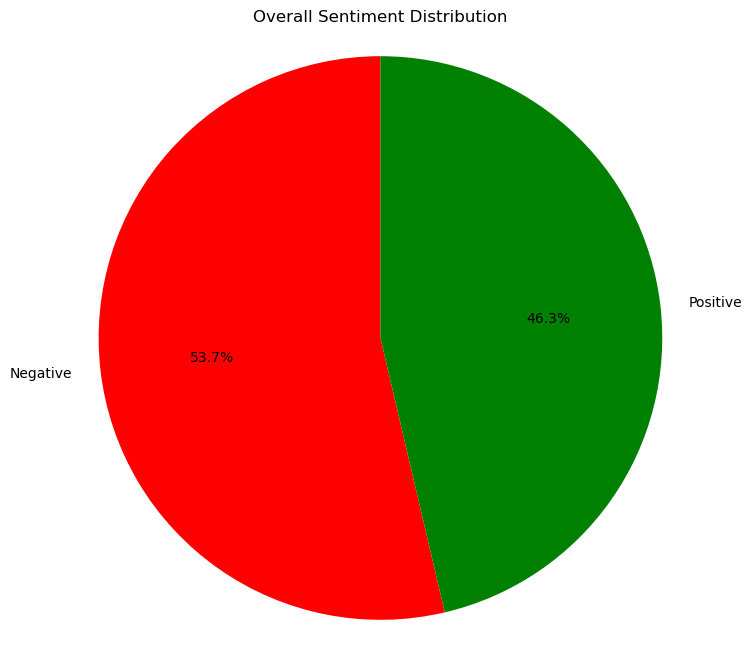

In [69]:
plt.figure(figsize=(8, 8))
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Overall Sentiment Distribution')
plt.axis('equal')
plt.show()

In [70]:
df.columns

Index(['Id', 'Sentiment', 'Text_Tweet', 'word_count', 'char_count', 'avg_word',
       'stopwords', 'hastags', 'numerics', 'tweet_length', 'Tweet'],
      dtype='object')

## Buat model

In [71]:
X = df['Tweet']
y = df['Sentiment']

In [72]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer ()
# X = vectorizer.fit_transform(X).toarray()
# vectorizer

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
X_train.shape

(240,)

In [75]:
import numpy as np

In [76]:
#Let us create first create a table to store the results of various models 
results_df = pd.DataFrame(np.zeros((2,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
results_df.index=['Logistic Regression (LR)','Naïve Bayes Classifier (NB)'] #'Decision Tree Classifier (DT)', 'Linear Discriminant Analysis(LDA)','Random Forest Classifier (RF)', 'Support Vector Classifier (SVC)'
results_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0


In [77]:
#Let us define functions to summarise the Prediction's scores .
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    results_df.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100   
    results_df.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #, average='weighted'
    results_df.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #, average='weighted'
    results_df.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #, average='weighted'
    results_df.iloc[i]['AUC/ROC score']=round(roc_auc_score(y_test, pred_prob, multi_class='ovr'),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,results_df.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
    
    auc_roc(y_test, pred_prob, curves=['each_class'])
    plt.show()

In [78]:
#Visualising Function
def AUC_ROC_plot(y_test, pred):    
    ref = [0 for _ in range(len(y_test))]
    ref_auc = roc_auc_score(y_test, ref)
    lr_auc = roc_auc_score(y_test, pred)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ref)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(y_test, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [79]:
## Logistic Regression Model

In [80]:
# Building Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR = LR_model.fit(X_train, y_train)
pred = LR.predict(X_test)
pred_prob = LR.predict_proba(X_test)
Classification_Summary(pred,pred_prob,0)

ValueError: could not convert string to float: 'betah aja . : v # oper : v provid'

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:
#Naive Bayes Classfier
NB_model = BernoulliNB()
NB = NB_model.fit(X_train, y_train)
pred = NB.predict(X_test)
pred_prob = NB.predict_proba(X_test)
Classification_Summary(pred,pred_prob,1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

### Feature Engineering

In [ ]:
#apply praposes
text = df['Tweet'].apply(preprocess)
label = df['Sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(text,label, test_size=0.3, random_state=42)

#pra proses tf - idf
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Pemodelan data dengan SVM

In [ ]:
#panggil fungsi svm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

### Evaluasi data Uji

In [ ]:
# Lakukan prediksi pada data uji
y_pred = svm_model.predict(X_test_tfidf)

# Evaluasi model
print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Evaluasi data latih

In [ ]:
# Lakukan prediksi pada data uji
y_pred_train = svm_model.predict(X_train_tfidf)

# Evaluasi model
print(classification_report(y_train, y_pred_train))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
print("Accuracy:", accuracy_score(y_test, y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
### Membuat model dengan Multinomial NB

In [ ]:
# buat model Multinomial Naive Bayes
MNB = MultinomialNB()

# latih model
MNB.fit(X_train_tfidf, y_train)

# prediksi pada data uji
y_pred = MNB.predict(X_test_tfidf)

# evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=MNB.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Inferensi Kalimat

In [ ]:
def predict_sentiment(sentence, model, vectorizer):
    # Pra-pemrosesan kalimat menggunakan TF-IDF
    sentence_tfidf = vectorizer.transform([sentence])

    # Lakukan prediksi
    predicted_label = model.predict(sentence_tfidf)

    return predicted_label[0]

# Contoh kalimat yang akan diprediksi
sentence = "<PROVIDER_NAME> 1berbagi tanpa kuota 2 berbagai kapan saja <PROVIDER_NAME> bagi berkah <USER_MENTION>"

# Melakukan prediksi label untuk kalimat
predicted_label = predict_sentiment(sentence, svm_model, tfidf_vectorizer)

print("Predicted Label:", predicted_label)

In [ ]:
def predict_sentiment(sentence, model, vectorizer):
    # Pra-pemrosesan kalimat menggunakan TF-IDF
    sentence_tfidf = vectorizer.transform([sentence])

    # Lakukan prediksi
    predicted_label = model.predict(sentence_tfidf)

    return predicted_label[0]

# Contoh kalimat yang akan diprediksi
sentence = "Kenapa! Masa buka Facebook aja gak bisa <PROVIDER_NAME>"

# Melakukan prediksi label untuk kalimat
predicted_label = predict_sentiment(sentence, svm_model, tfidf_vectorizer)

print("Predicted Label:", predicted_label)

In [ ]:
df.columns

## Visualisasi Data to WordCloud

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cellular Service Provider Tweets')
plt.show()

wordcloud.to_file("cellular_service_wordcloud.png")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Simpan model ke file .sav
# joblib.dump(MNB, 'model/MNB.sav')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.sav')

In [ ]:
### save model

In [ ]:
# import joblib

# # Simpan model ke file .pkl
# joblib.dump(MNB, 'model.pkl')

# # Simpan model ke file .sav
# joblib.dump(MNB, 'MNB.sav')

In [ ]:
# # Muat model dari file .sav
# loaded_model = joblib.load('MNB.sav')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, title):
    if text.strip():  # Check if text is not empty
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No words to display for {title}")

positive_text = ' '.join(df[df['Sentiment'] == 1]['Tweet'])
negative_text = ' '.join(df[df['Sentiment'] == 0]['Tweet'])

create_wordcloud(positive_text, 'Positive Sentiment Word Cloud')
create_wordcloud(negative_text, 'Negative Sentiment Word Cloud')
